# Taylor Cina D212 Performance Assessment

## Task 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

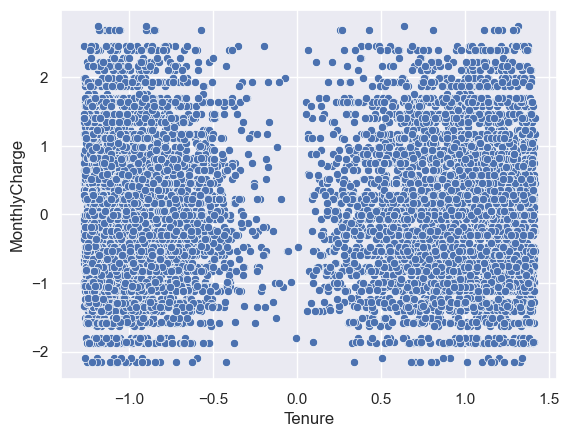

In [93]:
#Part C Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)

csv = pd.read_csv("churn_clean.csv", keep_default_na=False)
print(csv.info())
print(csv.describe(), "\n")

#list of numerical columns
csv = csv[['Tenure', 'MonthlyCharge']]

#Scale data, output to new dataframe
scaler = StandardScaler()
csv_scaled = pd.DataFrame(scaler.fit_transform(csv), columns = csv.columns)
print(csv_scaled)

ax = sns.scatterplot(data = csv_scaled, x = 'Tenure', y = 'MonthlyCharge')
plt.show()

#Save to file
csv_scaled.to_csv("TCina D212 T1 Scaled.csv")

c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mugenri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


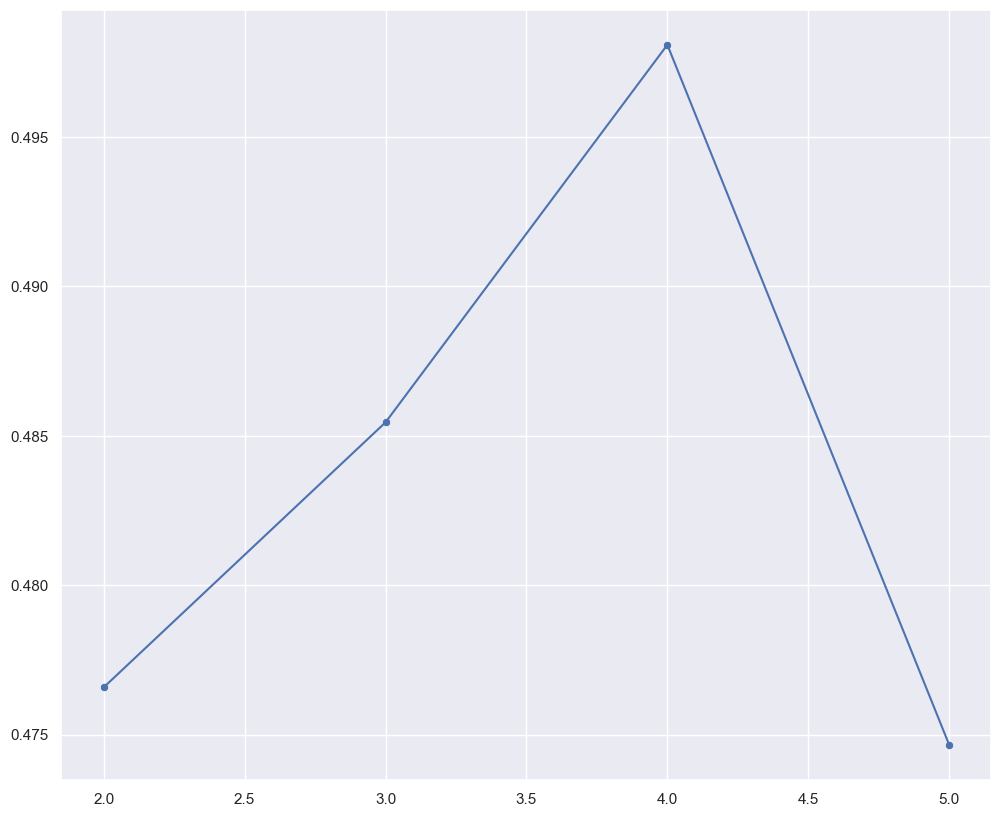

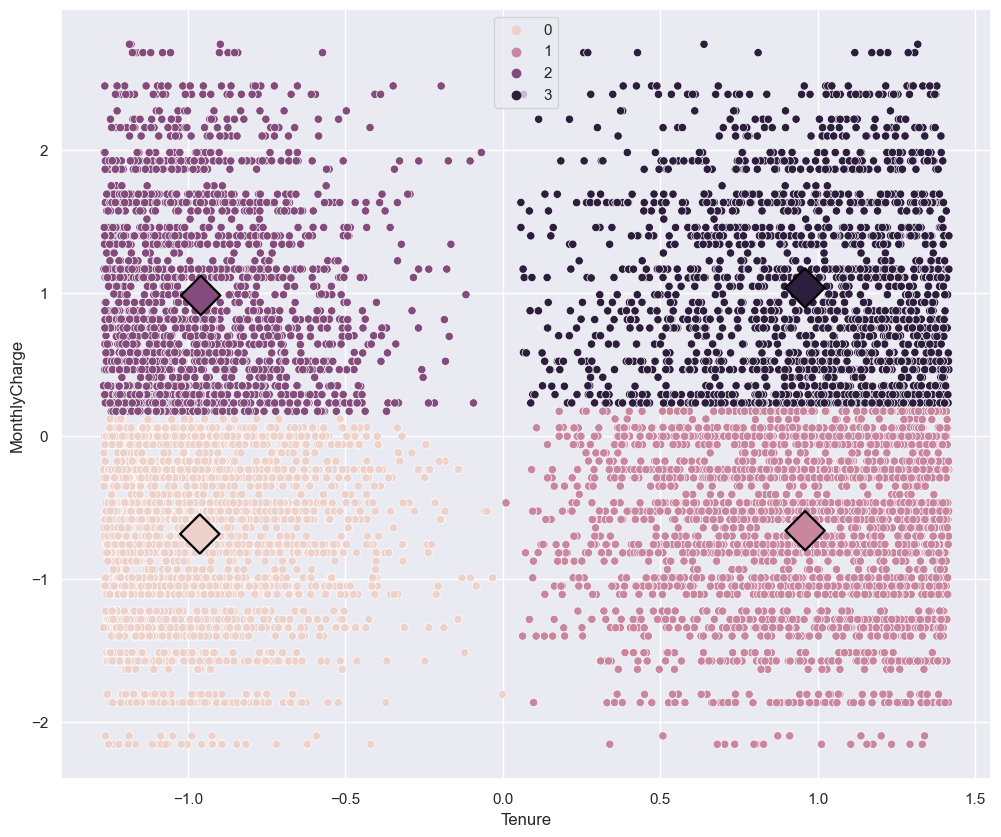

In [95]:
#Part D Analysis

min_k = 2
max_k = 6
seed = 42
#hyperparameter tuning
silhouette = []
for k in range (min_k, max_k):
    model = KMeans(n_clusters = k, n_init = 25, random_state=seed)
    model.fit(csv_scaled[['Tenure', 'MonthlyCharge']])
    silhouette.append(silhouette_score(csv_scaled[['Tenure', 'MonthlyCharge']], model.labels_))

silhouette_s = pd.Series(silhouette, index = range(min_k, max_k))

plt.figure(figsize=(12, 10))
ax = sns.lineplot(y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index)
plt.show()

#fit model
model = KMeans(n_clusters = 4, n_init = 25, random_state=seed)
model.fit(csv_scaled)

#plot
centroids = pd.DataFrame(model.cluster_centers_, columns = (['Tenure', 'MonthlyCharge']))

plt.figure(figsize=(12, 10))
ax = sns.scatterplot(data = csv_scaled,
                     x = 'Tenure',
                     y = 'MonthlyCharge',
                     hue = model.labels_)

ax = sns.scatterplot(data = centroids,
                     x = 'Tenure',
                     y = 'MonthlyCharge',
                     hue = centroids.index,
                     s = 400,
                     edgecolor = "Black",
                     legend = False,    
                     marker = "D")

plt.show()